In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_parquet("AQI_Historical_New\AQI_Historical_Sep_2022.parquet")

In [3]:
df.head()

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3,coord.lon,coord.lat,TRT_ID
0,2022-08-31 23:00:00,3,226.97,0.28,3.43,164.51,2.12,7.61,11.06,1.14,-111.9297,33.5032,20
1,2022-09-01 00:00:00,3,226.97,0.25,4.07,163.08,2.21,8.26,12.22,1.16,-111.9297,33.5032,20
2,2022-09-01 01:00:00,3,230.31,0.17,5.48,154.50,2.26,8.53,13.03,1.22,-111.9297,33.5032,20
3,2022-09-01 02:00:00,3,236.99,0.02,7.03,148.77,2.47,8.52,13.16,1.28,-111.9297,33.5032,20
4,2022-09-01 03:00:00,3,236.99,0.00,6.51,143.05,2.35,7.86,12.12,1.27,-111.9297,33.5032,20


In [4]:
df["dt"] = pd.to_datetime(df["dt"])

In [5]:
df['lat,lon'] = df['coord.lat'].astype(str) + ','+ df['coord.lon'].astype(str)

In [8]:
df = df.drop('coord.lon', axis=1)
df = df.drop('coord.lat', axis=1)

In [9]:
df['dt'].nunique()

720

In [5]:
X = df.drop("main.aqi", axis=1)
y = df["main.aqi"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

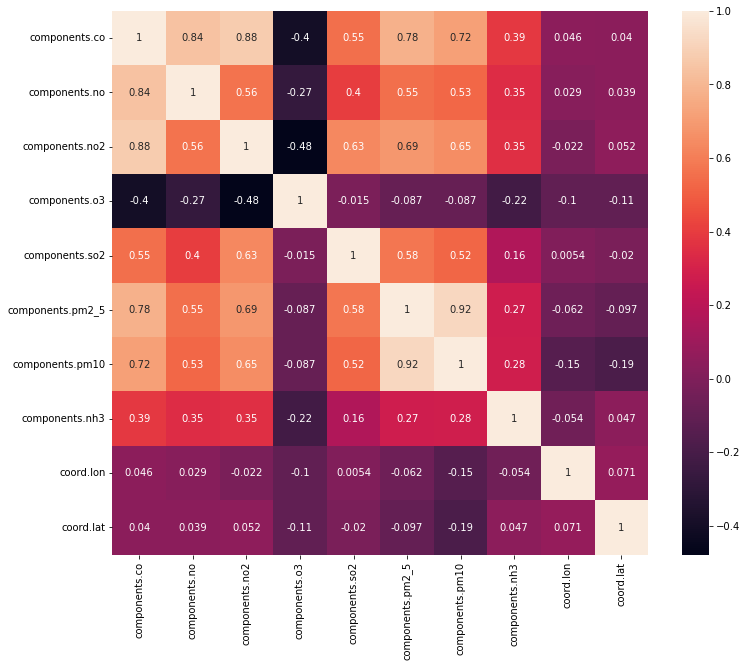

In [7]:
import seaborn as sns

plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), rf.oob_score_, rf.score(X_test, y_test)))

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [10]:
from prophet import Prophet

In [11]:
df.rename(columns={'dt':'ds', 'components.pm2_5':'y'}, inplace=True)
df.head()

,ds,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,y,components.pm10,components.nh3,TRT_ID,"lat,lon"
0,2022-08-31 23:00:00,3,226.97,0.28,3.43,164.51,2.12,7.61,11.06,1.14,20,"33.5032,-111.9297"
1,2022-09-01 00:00:00,3,226.97,0.25,4.07,163.08,2.21,8.26,12.22,1.16,20,"33.5032,-111.9297"
2,2022-09-01 01:00:00,3,230.31,0.17,5.48,154.50,2.26,8.53,13.03,1.22,20,"33.5032,-111.9297"
3,2022-09-01 02:00:00,3,236.99,0.02,7.03,148.77,2.47,8.52,13.16,1.28,20,"33.5032,-111.9297"
4,2022-09-01 03:00:00,3,236.99,0.00,6.51,143.05,2.35,7.86,12.12,1.27,20,"33.5032,-111.9297"


In [12]:
m = Prophet()
m.fit(df)

10:59:15 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 